In [75]:
import matplotlib.pyplot as plt
import numpy as np

from gglm.glm.base import GLM
from kernel.fun import KernelFun
from kernel.rect import KernelRect
from processes.ar1 import AR1
from processes.ou import OUProcess

%load_ext autoreload
%autoreload 2
plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
def unbiased_mu_var(x, arg0=0):
    T = x.shape[0]
    mu = np.mean(np.mean(x[arg0:], 0))
    musd2 = np.mean(np.mean(x[arg0:]**2, 0))
#     mu2_x = len(t) / (len(t) - 1) * mu_x**2 - 1 / (len(t) - 1) * musd2_x
    var = musd2 * (1 + 1 / (T - 1)) - T / (T - 1) * mu**2
    return mu, var

def biased_mu_var(x, arg0=0):
    mu = np.mean(np.mean(x[arg0:], 0))
    var = np.mean(np.var(x[arg0:], 0))
    return mu, var

In [103]:
A, np.sum(kappa.interpolate(np.arange(kappa.support[0], kappa.support[1] + dt, dt)))
np.sum(kappa.interpolate(np.arange(kappa.support[0], kappa.support[1] + dt, dt))**2)

0.002206662222726989

3 3.029023463188166
41.025641025641015 41.136056477807685
0.630474016030356 0.636613309003571
0.09052973221444055 1.1967984100451337


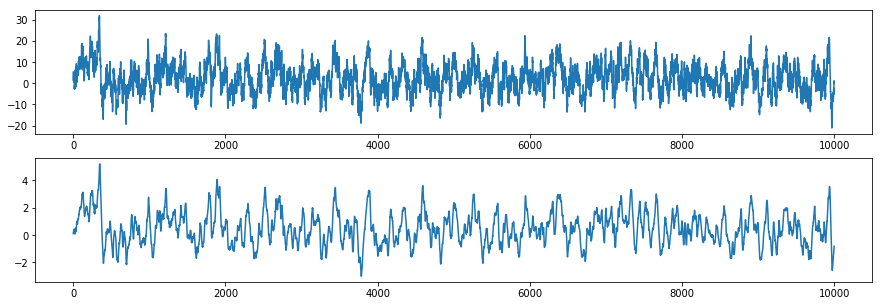

In [107]:
tau_kappa = 10
kappa = KernelFun.exponential([tau_kappa], coefs=[2e-2])

dt = 1
t = np.arange(0, 10000, dt)
# stim = OUProcess(mu=3, sd=2, tau=3)

mu, sd, phi = 3, 2, 0.95
x = AR1(mu=mu, sd=sd, phi=phi).sample(t, shape=(1000,))
y = kappa.convolve_continuous(t, x)
A = kappa.area(dt)
A2 = np.sum(kappa.interpolate(np.arange(kappa.support[0], kappa.support[1] + dt, dt))**2)

tau = dt / (1 - phi)
arg0 = int(tau_kappa * 10 / dt)

mu_x, var_x = unbiased_mu_var(x, arg0=arg0)
mu_y, var_y = biased_mu_var(y, arg0=arg0)

mu_x_theory = mu
var_x_theory = sd**2 / (1 - phi**2)
mu_y_theory = A * mu
var_y_theory = A2 * sd**2 / (1 - phi**2)

print(mu_x_theory, mu_x)
print(var_x_theory, var_x)
print(mu_y_theory, mu_y)
print(var_y_theory, var_y)

fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), nrows=2)
ax1.plot(t, x[:, 0])
ax2.plot(t, y[:, 0])

In [51]:
sd**2 / (1 - phi**2) + mu**2

50.025641025641015